
# Projet 3 — Prédiction du Churn Client (EDA + Préparation des données)

**Architecte en IA — Année 1 — L'École Multimédia**  
Ce notebook couvre : chargement du dataset, contrôle qualité, nettoyage, encodage, normalisation et préparation d'un pipeline prêt pour l'entraînement.


## 1) Préparation de l'environnement

In [ ]:

# (Optionnel) vérifier/installer les dépendances si besoin
# Vous pouvez commenter ces lignes si déjà installées.
# %pip install pandas numpy scikit-learn matplotlib joblib
%matplotlib inline
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
pd.set_option("display.max_columns", 100)

'''
Ces bibliothèques sont indispensable pour le bon fonctionemment du code
'''

## 2) Chargement des données

In [ ]:

# Chemin du fichier complet (CSV Kaggle)
DATA_PATH = Path("telco_sample.csv")

# On utilise un échantillon stocké pour rendre le notebook exécutable immédiatement
if not DATA_PATH.exists():
    DATA_PATH = Path("C:/Users/mckll/Desktop/projet3_churn_repo/telco_sample.csv")
    print("⚠️ Fichier principal introuvable. Utilisation de l'échantillon:", DATA_PATH)

df_raw = pd.read_csv(DATA_PATH)
print(df_raw.shape)
df_raw.head(3)
plt.show()

'''
Cette partie du code est indispensable pour récupérer les données présents dans le DataBase qui sont sous forme brut donc inexploitable
'''

(107, 21)


## 3) Contrôle qualité des données

In [ ]:

# Types des colonnes
display(df_raw.dtypes)

# Valeurs manquantes
na_counts = df_raw.isna().sum().sort_values(ascending=False)
display(na_counts[na_counts>0])

# Valeurs uniques par colonne (pratique pour catégorielles)
unique_counts = df_raw.nunique().sort_values(ascending=True)
display(unique_counts)
plt.show()

'''
Ci-dessous, nous pouvons voir les différents paramètres (à gauche) et leurs value (à droite)
Les values:
Oject = chaîne de caractère
int64 = entier
float64 = valeur décimale
'''


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Series([], dtype: int64)

gender                2
SeniorCitizen         2
Partner               2
Dependents            2
PhoneService          2
PaperlessBilling      2
Churn                 2
MultipleLines         3
TechSupport           3
StreamingTV           3
OnlineBackup          3
DeviceProtection      3
StreamingMovies       3
Contract              3
OnlineSecurity        3
InternetService       3
PaymentMethod         4
tenure               48
MonthlyCharges       99
TotalCharges        106
customerID          107
dtype: int64

## 4) Nettoyage & préparation

In [ ]:

df = df_raw.copy()

# 4.1 — suppression de l'ID
if "customerID" in df.columns:
    df.drop(columns=["customerID"], inplace=True)

# 4.2 — conversion de TotalCharges en numérique
if "TotalCharges" in df.columns:
    df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
    # imputation par la médiane (on documente ce choix dans le rapport)
    df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

# 4.3 — harmonisation des labels 'No internet service' / 'No phone service' -> 'No'
service_cols = ["MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection",
                "TechSupport","StreamingTV","StreamingMovies"]
for c in service_cols:
    if c in df.columns:
        df[c] = df[c].replace({"No internet service":"No", "No phone service":"No"})

# 4.4 — encodage de la cible
if "Churn" in df.columns:
    df["Churn"] = df["Churn"].map({"Yes":1, "No":0}).astype(int)

print(df.shape)
df.head(3)
plt.show()

'''
Ici, on a trié, nettoyé les données afin de les rendre exploitable. 
'''

(107, 20)


C:\Users\mckll\AppData\Local\Temp\ipykernel_13508\3386514952.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


## 5) Analyse exploratoire (EDA)

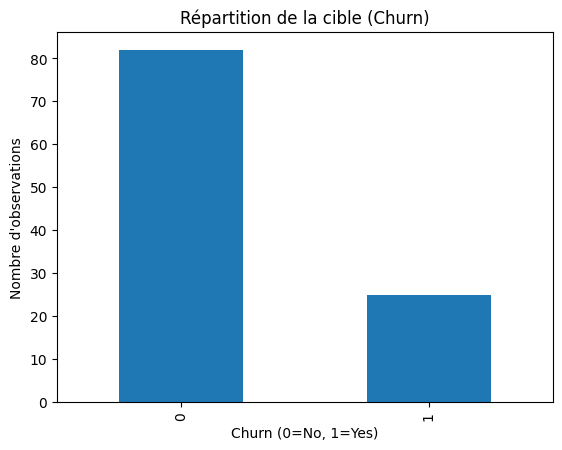

In [ ]:

# 5.1 — Répartition de la cible
if "Churn" in df.columns:
    counts = df["Churn"].value_counts().sort_index()
    fig = plt.figure()
    counts.plot(kind="bar")
    plt.title("Répartition de la cible (Churn)")
    plt.xlabel("Churn (0=Arriver, 1=Départ)")
    plt.ylabel("Nombre d'observations")
    plt.show()
else:
    print("Colonne 'Churn' non trouvée.")
plt.show()

'''
Le graphique ci-dessous, présente le nombre de client qui ont résilié l'aboonement (1) et ceux qui sont restés(0).
De ce fait, nous voyons que un peu plus de 80 personnes sont restés avec leur contrat et qu'environ 25 personnes ont résiliés
'''

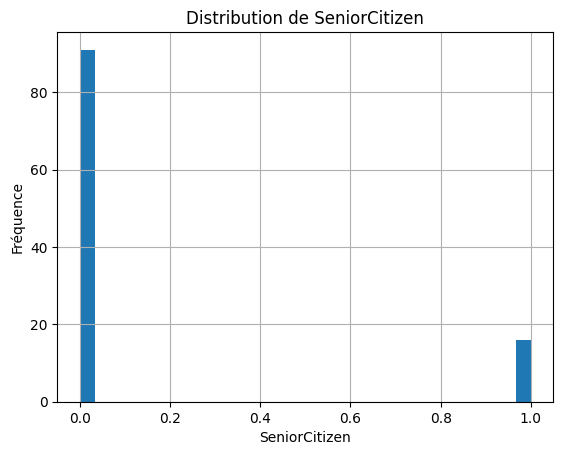

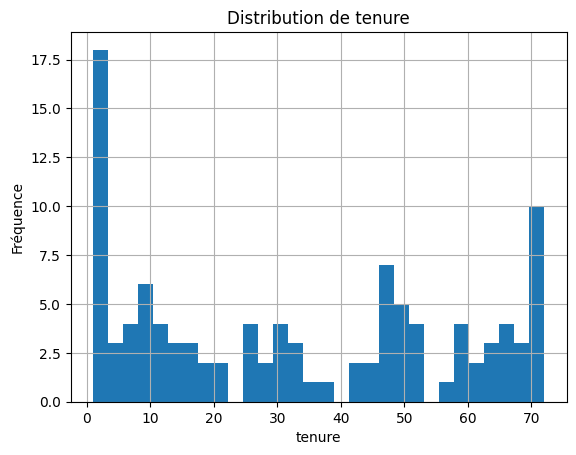

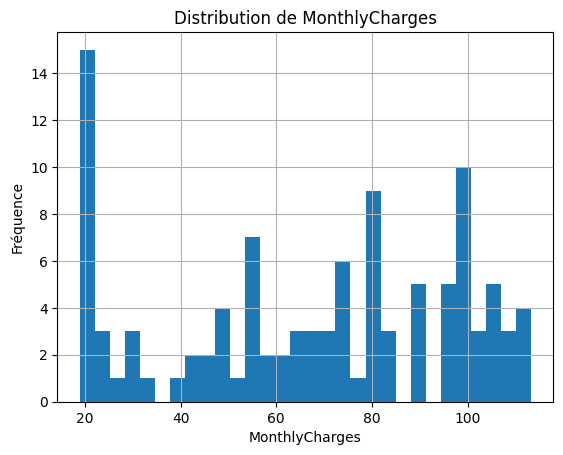

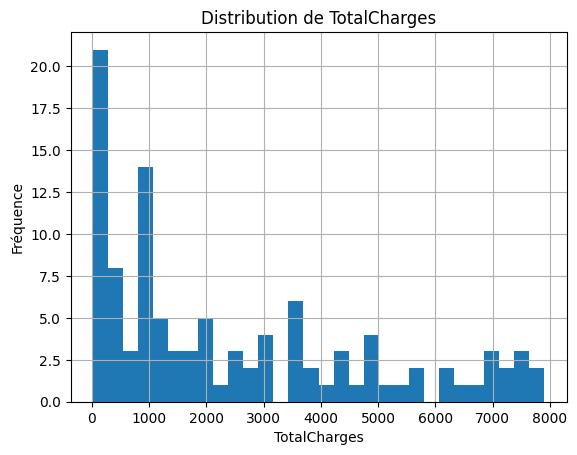

In [ ]:

# 5.2 — Distributions des variables numériques
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if "Churn" in numeric_cols:
    numeric_cols.remove("Churn")

for col in numeric_cols:
    fig = plt.figure()
    df[col].hist(bins=30)
    plt.title(f"Distribution de {col}")
    plt.xlabel(col); plt.ylabel("Fréquence")
    plt.show()

    '''
    Dans le premier graphique , on constate que la majeure partie des clients sont des adultes (90 clients) et le reste des mineurs (17 clients)
    Le second graphique , 48 valeurs différentes (car clients présents depuis 1 à 72 mois, mais pas tous les mois apparaissent).
    Et le dernier est la charge total, il suffit de multiplier les deu xgraphique précédents pour l'obtenir
    '''

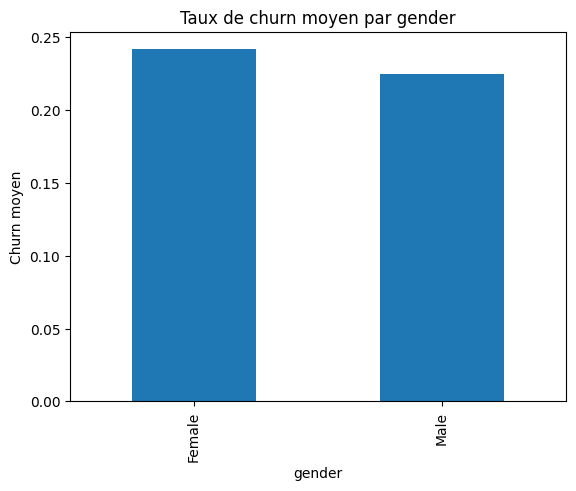

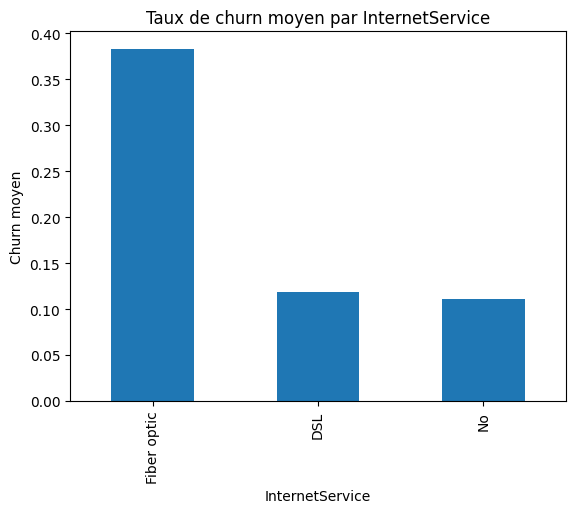

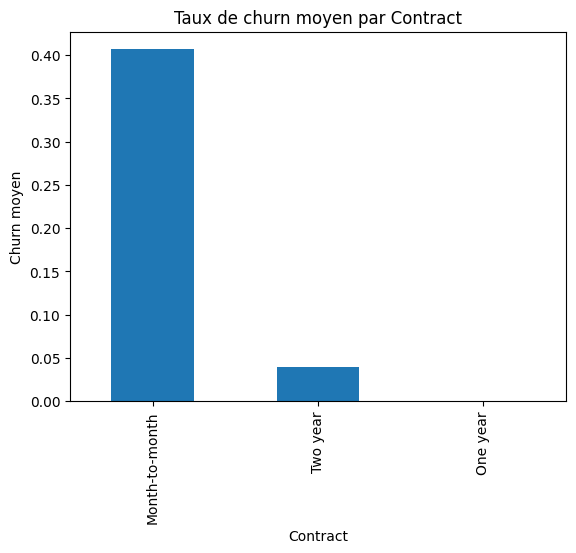

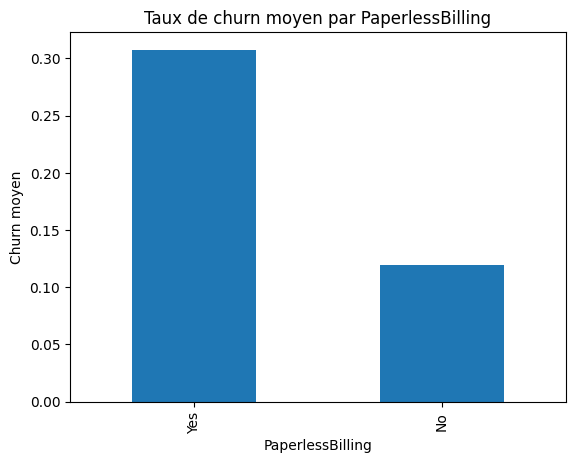

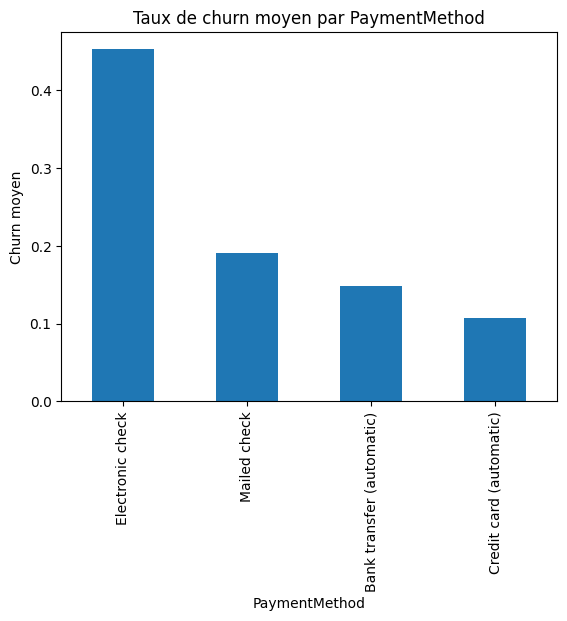

In [ ]:

# 5.3 — Taux de churn moyen par modalité pour quelques variables catégorielles
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
preview_cols = [c for c in cat_cols if c in ["gender","Contract","PaymentMethod","InternetService","PaperlessBilling"]]

for col in preview_cols:
    if "Churn" in df.columns:
        grp = df.groupby(col)["Churn"].mean().sort_values(ascending=False)
        fig = plt.figure()
        grp.plot(kind="bar")
        plt.title(f"Taux de churn moyen par {col}")
        plt.ylabel("Churn moyen")
        plt.xlabel(col)
        plt.show()
'''
Les graphiques ci-dessous montrent le churn par catégorie ( sexe, contrat etc..)
Le graphique 1, montre qu'il y a légèrement plus de femme que d'hommes qui ont un contrat
Le graphique 2, montre les 2 facons d'avoir internet (fibre ou ADSL) ou de ne pas en avoir. On voit qu'en majorité les gens prennet la fibre optique
Le graphique 3, montre qu'en général les gens préfèrent un contrat mensuel pltôt que de s'engager pour 1 voire 2ans
Le graphique 4 et 5, montrent les client préfèrent payer en ligne plutôt qu'en espèce ou autre
'''

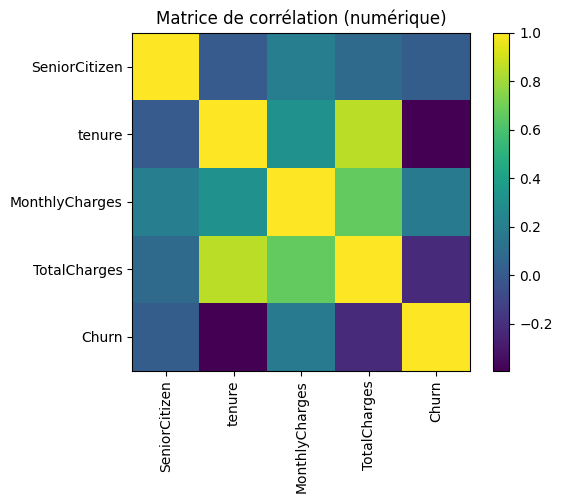

In [ ]:

# 5.4 — Corrélations numériques
if len(numeric_cols)>0:
    corr = df[numeric_cols + (["Churn"] if "Churn" in df.columns else [])].corr()
    fig = plt.figure(figsize=(6,5))
    plt.imshow(corr, interpolation="nearest")
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.index)), corr.index)
    plt.title("Matrice de corrélation (numérique)")
    plt.colorbar()
    plt.tight_layout()
    plt.show()
    '''
    Ici, nous avons une matrice de corrélation. Elle nous permet de connaître les points forts(jaune) et faible(violet) de l'entreprise.
    Par exemple, nous voyons que "tenure" et "churn" sont en violet. Ce qui est logique car s'il y a un churn, des clients partent donc le contrat touche à sa fin ainsi sa temporalité aussi
    Néanmoins, "totalcharge" et "monthlycharge" sont en vert clair. Ce qui est logique ecar la sommes des monthlycharge correspond aux totalcharge


## 6) Préparation du pipeline

In [ ]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Séparation X/y
y = df["Churn"].values if "Churn" in df.columns else None
X = df.drop(columns=["Churn"]) if "Churn" in df.columns else df.copy()

num_features = X.select_dtypes(include=[np.number]).columns.tolist()
cat_features = X.select_dtypes(include=["object","category","bool"]).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
    ]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

len(X_train), len(X_test)
plt.show()

'''
la pipeline sert à relier preprocessing + modèle pour prédire le churn en un seul objet réutilisable (y compris dans dnas API
'''

## 7) Modèle baseline — Régression Logistique

In [ ]:

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay

logreg_clf = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("clf", LogisticRegression(max_iter=200, n_jobs=None))  # n_jobs not used by LR, left as default
])

logreg_clf.fit(X_train, y_train)
y_pred = logreg_clf.predict(X_test)
y_prob = logreg_clf.predict_proba(X_test)[:,1]

metrics = {
    "accuracy": accuracy_score(y_test, y_pred),
    "precision": precision_score(y_test, y_pred, zero_division=0),
    "recall": recall_score(y_test, y_pred, zero_division=0),
    "f1": f1_score(y_test, y_pred, zero_division=0),
    "roc_auc": roc_auc_score(y_test, y_prob)
}
metrics
plt.show()
'''
Ce code entraîne simplement la régression logistique avec preprocessing. Donc pour mieux prédire si un client va churner(partir) ou pas.
'''

<Figure size 640x480 with 0 Axes>

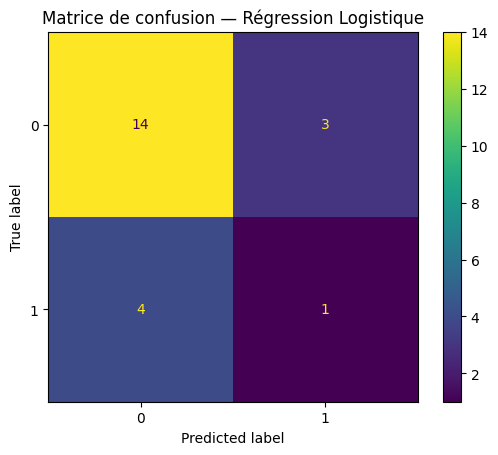

<Figure size 640x480 with 0 Axes>

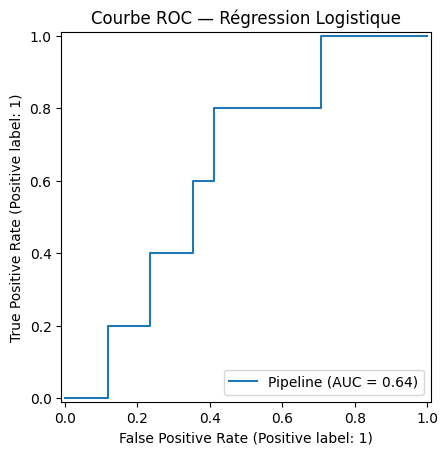

In [ ]:

fig = plt.figure()
ConfusionMatrixDisplay.from_estimator(logreg_clf, X_test, y_test)
plt.title("Matrice de confusion — Régression Logistique")
plt.show()

fig = plt.figure()
RocCurveDisplay.from_estimator(logreg_clf, X_test, y_test)
plt.title("Courbe ROC — Régression Logistique")
plt.show()
'''
Ici, nous avons une matrice de confusion et la courbe ROC-logistique
Matrice de confusion → montre les types d’erreurs du modèle (FN = clients perdus).
Courbe ROC → montre la capacité globale du modèle à distinguer churn vs non churn.
AUC → score unique pour comparer les modèles.
'''

## 8) Export des artefacts (préprocesseur / features)

In [ ]:

from joblib import dump
out_dir = Path("./artifacts")
out_dir.mkdir(exist_ok=True)
dump(preprocessor, out_dir / "preprocessor.joblib")
X.columns.to_series().to_csv(out_dir / "feature_columns.csv", index=False)
print("Artefacts sauvegardés dans:", out_dir.resolve())

'''
Ce code permet simplement de sauvegarde les fichiers.
Le mettre en place ici, va nous permettre de le rappeler plus tard pour l'API 
'''


Artefacts sauvegardés dans: C:\Users\mckll\Desktop\projet3_churn_repo\artifacts
